# Requires:
pip install -U pm4py
install graphviz


### 1. Importing and Verifying the PM4Py Library

This code imports **PM4Py**, a Python library for **process mining**, which is commonly used to analyze event logs, discover process models, and perform conformance checking.

The second line prints the currently installed **PM4Py version**, which is useful for:


In [87]:
import pm4py

print(pm4py.__version__)

2.7.19.3


### 2. Loading a BPMN Model and Listing Its Nodes

This code reads a **BPMN (.bpmn) file** into a PM4Py BPMN object, extracts all nodes (e.g., tasks, events, gateways), and prints each node’s **Python class/type** and its **BPMN label/name**.



In [88]:
bpmn = pm4py.read_bpmn("group_10.bpmn")
nodes = bpmn.get_nodes()

for node in nodes:
    print(type(node), node.get_name())


<class 'pm4py.objects.bpmn.obj.BPMN.Task'> Send Mail To Parents
<class 'pm4py.objects.bpmn.obj.BPMN.Task'> Send Confirmation Mail
<class 'pm4py.objects.bpmn.obj.BPMN.Task'> Calculate Claim
<class 'pm4py.objects.bpmn.obj.BPMN.ExclusiveGateway'> documents complete?
<class 'pm4py.objects.bpmn.obj.BPMN.ExclusiveGateway'> 
<class 'pm4py.objects.bpmn.obj.BPMN.Task'> Write Notification
<class 'pm4py.objects.bpmn.obj.BPMN.ExclusiveGateway'> 
<class 'pm4py.objects.bpmn.obj.BPMN.Task'> Write Rejection
<class 'pm4py.objects.bpmn.obj.BPMN.ExclusiveGateway'> 
<class 'pm4py.objects.bpmn.obj.BPMN.Task'> ReviewDocuments
<class 'pm4py.objects.bpmn.obj.BPMN.Task'> Send Rejection
<class 'pm4py.objects.bpmn.obj.BPMN.NormalEndEvent'> Application handled
<class 'pm4py.objects.bpmn.obj.BPMN.ExclusiveGateway'> check parent status
<class 'pm4py.objects.bpmn.obj.BPMN.Task'> Assess Application
<class 'pm4py.objects.bpmn.obj.BPMN.NormalStartEvent'> Application started
<class 'pm4py.objects.bpmn.obj.BPMN.Exclusive

### 3. Importing PM4Py Modules for Conformance Checking and Simulation

These imports prepare PM4Py functionality for **(1) conformance checking** using alignments and **(2) Petri net simulation (playout)**.

In [89]:
#from pm4py.objects.conversion.bpmn import factory as bpmn_to_petri
from pm4py.algo.conformance.alignments.petri_net import algorithm as align_algo
from pm4py import read_xes
from pm4py.algo.simulation.playout.petri_net import algorithm as pn_playout
from pm4py.algo.simulation.playout.petri_net.variants import basic_playout
from pm4py.algo.simulation.playout.petri_net.variants import extensive


### 4. Petri Net Playout Parameters (Basic vs. Extensive) and Practical Alternatives

Here you try different **parameter settings** and **playout variants** to control how traces are simulated from the Petri net.

- **Basic playout** is typically faster and generates traces via simpler/randomized execution.
- **Extensive playout** tries to explore behavior more systematically, but can take much longer—especially with loops—so a strict max trace length is important.

Also note that PM4Py supports **different parameter styles**:
- Using enum-like keys (e.g., `basic_playout.Parameters.NO_TRACES`)
- Using plain string keys (e.g., `"no_traces"`, `"max_trace_length"`) depending on the version/variant.

Important corrections and notes:
- The earlier print text should not say “extensive playout” if you used the **basic** variant.
- When using the **EXTENSIVE** variant, parameters should match the variant’s expected keys (e.g., `extensive.Parameters.MAX_TRACE_LENGTH`).
- The “string key” parameter block is a more **version-tolerant** style, but not every PM4Py version supports every key (e.g., `"show_progress_bar"`).

What each block is doing:
- **Basic playout (200 traces, max length 50):** a quick, controlled simulation for small experiments.
- **Extensive playout (max length 50):** explores more behavior, but can be slow; the max length acts as a safety cap for loops.
- **Generic/string-keys configuration:** a convenient way to set common options like number of cases, max trace length, random seed, and (sometimes) a progress bar; behavior depends on PM4Py version and the selected variant.




parameters = {
    extensive.Parameters.MAX_TRACE_LENGTH: 50  # hard cap for loops but takes time to finish
}


parameters = {
    "no_traces": 200,          # number of cases you want to simulate
    "max_trace_length": 50,    # safety limit for loops
    "seed": 42,
    # show a progress bar (depends on version)
    "show_progress_bar": True,

    # variant: "random" (default) vs "extensive"
    # - "random": random walks through the net
    # - "extensive": try to explore different paths more systematically
    "variant": "random",
}

log = pn_playout.apply(net, im, fm, parameters=parameters)


In [90]:
net, im, fm = pm4py.convert_to_petri_net(bpmn)

print(net)



parameters = {
    basic_playout.Parameters.NO_TRACES: 1000,    # mehr Fälle
    basic_playout.Parameters.MAX_TRACE_LENGTH: 80  # längere Traces erlaubt
}

log = pn_playout.apply(
    net,
    im,
    fm,
    parameters=parameters,
    variant=pn_playout.Variants.BASIC_PLAYOUT
)

print("Number of traces in extensive playout:", len(log))

places: [ ent_Activity_031corn, ent_Activity_0na27kh, ent_Activity_0pvdge2, ent_Activity_11ljlt8, ent_Activity_12go9h5, ent_Activity_1anmjnd, ent_Activity_1sghd3e, ent_Gateway_0amxybm, ent_Gateway_0bw7r2t, ent_Gateway_1ctv541, exi_Gateway_0j17y0t, exi_Gateway_0wbr4r3, exi_Gateway_142a9j9, sink, source ]
transitions: [ (0330fd29-ddec-4e0d-9144-da1ae4f78942, None), (Activity_02rdnqd, 'ReviewDocuments'), (Activity_031corn, 'Receive Parents Data'), (Activity_0dbquyc, 'Send Mail To Parents'), (Activity_0ir0f2q, 'Calculate Claim'), (Activity_0na27kh, 'ReceiveResubmission'), (Activity_0pvdge2, 'Write Notification'), (Activity_0vtb6uj, 'Generate Confirmation Mail'), (Activity_11ljlt8, 'Send Notification'), (Activity_12go9h5, 'Send Rejection'), (Activity_1anmjnd, 'Assess Application'), (Activity_1lip6o3, 'Write Rejection'), (Activity_1reuwa9, 'Store Application'), (Activity_1rula96, 'RequestResubmission'), (Activity_1sghd3e, 'Send Confirmation Mail'), (Gateway_0bw7r2t, None), (sfl_Flow_06dhjwd,

### 5. Discovering a Petri Net from an Event Log (Inductive Miner) and Visualizing It

This repeats the model-discovery step using **Inductive Miner** to derive a **Petri net** from the event log (`log`). The output is a new, discovered process model (`net_d`) with its start and end states (`im_d`, `fm_d`).

The visualization call then renders the discovered Petri net so you can inspect the structure (places, transitions, paths, and potential loops).  
Keep in mind that the variable name `log_d` is misleading here: the returned value is related to the **visualization/viewer**, not a log.


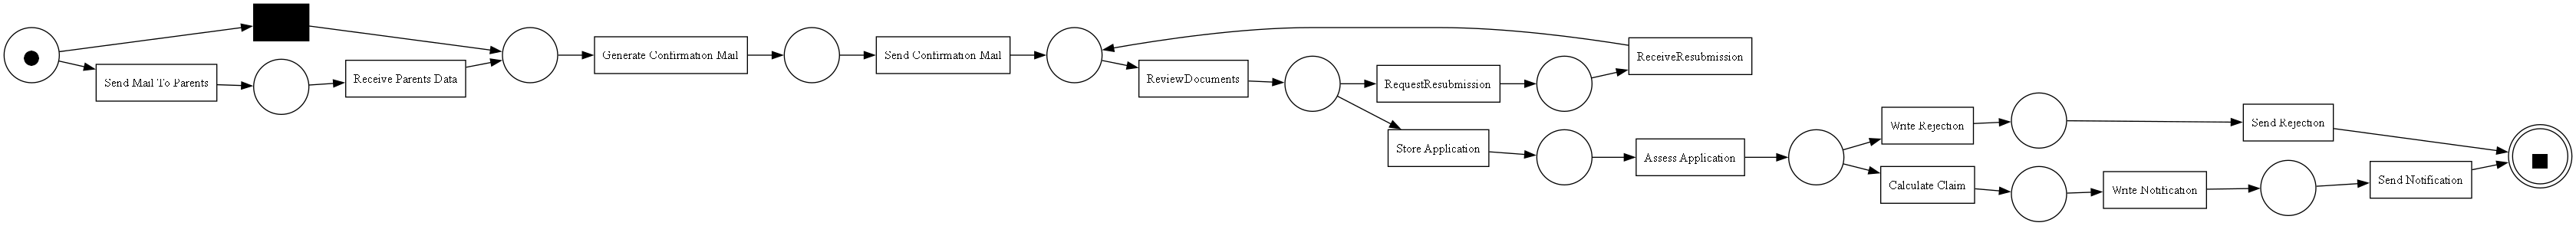

In [91]:
from pm4py import discover_petri_net_inductive

net_d, im_d, fm_d = discover_petri_net_inductive(log)

# Optional: visualize
log_d = pm4py.view_petri_net(net_d, im_d, fm_d)

### 6. Checking Which Model Transitions Actually Appear in the Simulated Log

This section compares the **activities recorded in the event log** with the **labeled transitions in the Petri net** to detect parts of the model that were **never executed** during simulation.

What it does:
- **Counts activities in the log:**  
  Uses `Counter` to count how often each event name (`"concept:name"`) appears across all traces.
- **Lists labeled transitions in the Petri net:**  
  Iterates over `net.transitions` and prints only transitions that have a `label` (i.e., real activities; unlabeled transitions are often silent/τ transitions).
- **Finds transitions never seen in the log:**  
  Prints transitions that exist in the model but whose labels do not appear in the log activity counts.  
  This is useful to spot:
  - paths that are rarely/never taken due to simulation settings,
  - dead branches caused by modeling issues,
  - behavior excluded by trace length limits or randomness in playout.


In [92]:
from collections import Counter

# activities that appear in the simulated log
acts_in_log = Counter(e["concept:name"] for trace in log for e in trace)
print("Activities in log (and counts):")
for a, c in acts_in_log.items():
    print(c, "x", a)

# all labeled transitions in the Petri net
print("\nTransitions in Petri net:")
for t in net.transitions:
    if t.label:
        print(t.label)

print("\nTransitions never seen in log:")
for t in net.transitions:
    if t.label and t.label not in acts_in_log:
        print("  ", t.label)

Activities in log (and counts):
512 x Send Mail To Parents
512 x Receive Parents Data
1000 x Generate Confirmation Mail
1000 x Send Confirmation Mail
2013 x ReviewDocuments
1013 x RequestResubmission
1013 x ReceiveResubmission
1000 x Store Application
1000 x Assess Application
504 x Write Rejection
504 x Send Rejection
496 x Calculate Claim
496 x Write Notification
496 x Send Notification

Transitions in Petri net:
Receive Parents Data
Write Rejection
Generate Confirmation Mail
Send Mail To Parents
ReviewDocuments
Store Application
Send Confirmation Mail
Write Notification
Send Rejection
Send Notification
RequestResubmission
Calculate Claim
Assess Application
ReceiveResubmission

Transitions never seen in log:


### 7. Exporting the Simulated Event Log to an XES File

This line writes the simulated event log (`log`) to disk in **XES format**, which is the standard file format used in process mining tools (including PM4Py, ProM, Celonis imports in some workflows, etc.).

Use cases:
- Saving the generated traces for reuse without re-simulating
- Sharing the log with teammates or importing it into other process-mining tools
- Running discovery/conformance experiments on a fixed dataset


In [93]:
# Generate XES file from the simulated log (Event Log) 
pm4py.write_xes(log, "simulated_log_Initially.xes")

exporting log, completed traces :: 100%|██████████| 1000/1000 [00:00<00:00, 17338.64it/s]


### Quick Sanity Checks on the Simulated Event Log

These print statements give a fast overview of the generated event log structure:

- Prints the **number of traces (cases)** in the log.
- Prints the **number of events** in the **first trace** (useful to see typical trace length).
- Prints the **activity name** (`"concept:name"`) of the **first event** in the first trace, confirming that the expected event attribute is present and readable.

This is a simple way to verify that simulation produced data in the expected PM4Py/XES-like format before exporting or analyzing it further.


In [94]:
print(len(log))                  # number of cases
print(len(log[0]))               # number of events in first trace
print(log[0][0]["concept:name"]) # first activity name

1000
15
Send Mail To Parents


### 8. POST Processing of XES Log to get realistic Event Attributes like Timestamp, Resource etc.

### Shifting All Timestamps in an XES Log to Start in 2024

This block loads an existing **XES event log**, detects the **earliest timestamp** in the log (often around 1970 when simulated logs start at the Unix epoch), and shifts **all event timestamps** forward so the log begins at a chosen reference date in **2024**. The updated log is then exported to a new XES file.

What it does:
- **Imports** the log from `INPUT_XES`.
- **Finds the global minimum timestamp** (`min_ts`) across all events in all traces.
- **Defines a new start time** (`base_2024`) as `2024-01-01 08:00:00`, using the *same timezone info* as the original timestamps to avoid tz-aware vs tz-naive issues.
- **Computes an offset** (`base_2024 - min_ts`) and applies it to every event timestamp.
- **Exports** the shifted log to `OUTPUT_XES` and prints the output filename.

Why this is useful:
- Makes simulated logs look like realistic, modern process data.
- Avoids confusing “1970 timestamps” when importing into tools or doing time-based analysis (durations, calendars, seasonality, etc.).


In [95]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from datetime import datetime, timedelta

INPUT_XES  = "simulated_log_Initially.xes"
OUTPUT_XES = "simulated_log_2024_shifted.xes"

log = xes_importer.apply(INPUT_XES)

# find global min timestamp (1970…)
min_ts = None
for trace in log:
    for event in trace:
        ts = event["time:timestamp"]
        if min_ts is None or ts < min_ts:
            min_ts = ts

# make base_2024 timezone-aware with same tzinfo as min_ts
base_2024 = datetime(2024, 1, 1, 8, 0, 0, tzinfo=min_ts.tzinfo)

offset = base_2024 - min_ts

for trace in log:
    for event in trace:
        old_ts = event["time:timestamp"]
        event["time:timestamp"] = old_ts + offset

xes_exporter.apply(log, OUTPUT_XES)
print("written:", OUTPUT_XES)


exporting log, completed traces :: 100%|██████████| 1000/1000 [00:00<00:00, 17241.85it/s]

written: simulated_log_2024_shifted.xes


### Retiming a Simulated XES Log with Realistic, Activity-Specific Delays

This script loads a previously shifted simulated event log and **re-generates timestamps** so each case looks more realistic: cases start at random dates in 2024 (during office hours), and each activity advances time by a **random delay** drawn from a distribution defined per activity.

What it does:
- **Loads an XES log** and converts it into a **DataFrame** for easier manipulation, then sorts events per case by timestamp.
- Defines helper functions to generate random delays in **minutes/hours/days**.
- Creates a `delay_rules` mapping: each activity name is assigned a delay generator (e.g., “Parent A data received” waits 3–21 days).
  - Activities not listed use a **default delay** (0–2 days).
- For each **case (trace)**:
  - Picks a random **case start time** in 2024, restricted to **08:00–16:59**.
  - Walks through the events in that case and accumulates time using the activity’s delay rule.
  - Writes the computed timestamps into a new `time:timestamp` column.
- Converts the retimed DataFrame back into an **event log** and exports a new XES file.

Why it’s useful:
- Produces logs with more plausible waiting times (e.g., email minutes vs. parental responses days/weeks).
- Enables time-based analyses (throughput times, waiting times, SLAs, seasonality) on data that resembles real processes.
- Makes simulation outputs more credible for demos, reports, and process mining experiments.


In [96]:
import random
from datetime import datetime, timedelta

import pandas as pd
import pm4py

# -----------------------------
# 1) Load original simulated log
# -----------------------------
log = pm4py.read_xes("simulated_log_2024_shifted.xes")

# to DataFrame
df = pm4py.convert_to_dataframe(log)
df["time:timestamp"] = pd.to_datetime(df["time:timestamp"])
df = df.sort_values(["case:concept:name", "time:timestamp"]).reset_index(drop=True)
  
# -----------------------------
# 2) Delay distributions per activity
# -----------------------------
def minutes(a, b):
    return timedelta(minutes=random.randint(a, b))

def hours(a, b):
    return timedelta(hours=random.randint(a, b))

def days(a, b):
    return timedelta(days=random.randint(a, b))

delay_rules = {
    "Check parent status":            lambda: days(0, 2),

    "Generateparent Amail":           lambda: minutes(0, 30),
    "Send mail to parent  A":         lambda: minutes(0, 10),
    "Parent A data received":         lambda: days(3, 21),

    "Generateparent Bmail":           lambda: minutes(0, 30),
    "Send mail to parent  B":         lambda: minutes(0, 10),
    "Parent B data received":         lambda: days(3, 21),

    "Checkdocumentscompleteness":     lambda: days(0, 3),

    "Requestparent Aresubmission":    lambda: days(0, 2),
    "Receiveparent Aresubmission":    lambda: days(5, 28),

    "Requestparent Bresubmission":    lambda: days(0, 2),
    "Receiveparent Bresubmission":    lambda: days(5, 28),

    "Requeststudentresubmission":     lambda: days(0, 2),
    "Receivestudentresubmission":     lambda: days(5, 28),

    "StoreResubmission":              lambda: days(0, 3),

    "Generateconfirmationmail":       lambda: days(0, 5),
    "Send confirmationmail":          lambda: minutes(0, 30),
}

default_delay = lambda: days(0, 2)

# -----------------------------
# 3) Assign new timestamps per case
# -----------------------------
new_timestamps = [None] * len(df)

for case_id, idxs in df.groupby("case:concept:name").groups.items():
    idxs = sorted(idxs)

    # random case start in 2024, during office hours
    start_date = datetime(2024, 1, 1) + timedelta(days=random.randint(0, 303))
    start_time = timedelta(
        hours=random.randint(8, 16),
        minutes=random.randint(0, 59),
        seconds=random.randint(0, 59),
    )
    current = start_date + start_time

    for i in idxs:
        act = df.at[i, "concept:name"]
        delay_fn = delay_rules.get(act, default_delay)
        current = current + delay_fn()
        new_timestamps[i] = current

df["time:timestamp"] = new_timestamps

# -----------------------------
# 4) Back to XES
# -----------------------------
new_log = pm4py.convert_to_event_log(df)
pm4py.write_xes(new_log, "simulated_log_retimed.xes")


exporting log, completed traces :: 100%|██████████| 1000/1000 [00:00<00:00, 15385.11it/s]


### More postprocessing adding timerevents

### Loading the Retimed XES Log and Preparing a DataFrame with Stable Event IDs

This snippet imports an XES event log (here, the retimed version), converts it into a pandas DataFrame, and prepares it for further processing by ensuring a consistent order and adding a unique identifier per event.

What it does:
- **Loads** the XES log from file (using the low-level XES importer).
- **Converts** the event log into a **DataFrame** for easier transformations and analysis.
- **Sorts** all events by case ID and timestamp to ensure a deterministic, correct sequence per trace.
- Adds an `event_id` column (`e_0`, `e_1`, …) so each event can be referenced reliably later (useful for joins, debugging, or adding relations/attributes).


In [97]:
import random
from datetime import timedelta
import pandas as pd
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
import pm4py

log = xes_importer.apply("simulated_log_retimed.xes")  # or original
df = pm4py.convert_to_dataframe(log)

# sort and create a stable event id
df = df.sort_values(["case:concept:name", "time:timestamp"]).reset_index(drop=True)
df["event_id"] = ["e_" + str(i) for i in range(len(df))]


parsing log, completed traces :: 100%|██████████| 1000/1000 [00:00<00:00, 12195.30it/s]


### Defining Rules for Inserting “Timer” Activities Between Specific Steps

`TIMER_RULES` is a mapping that specifies where to insert an intermediate **timer/wait activity** based on a detected transition in the process.

How it works:
- The key is a tuple: **(previous activity, next activity)**.
- The value is the **label** of a timer activity that represents the waiting period between those two steps (e.g., waiting for a parent’s response or a resubmission).

Why this is useful:
- Makes waiting time explicit in the event log/model (instead of being only an implicit gap in timestamps).
- Helps process mining tools visualize and analyze delays as concrete activities (e.g., bottlenecks, SLA violations, long response times).
- Allows different waiting situations to be distinguished (parent A vs parent B vs student).


In [98]:
# (prev_activity, next_activity) -> timer activity label
TIMER_RULES = {
    ("Send mail to parent  A", "Parent A data received"): "Timer parent A response",
    ("Send mail to parent  B", "Parent B data received"): "Timer parent B response",
    ("Requestparent Aresubmission", "Receiveparent Aresubmission"): "Timer parent A resubmission",
    ("Requestparent Bresubmission", "Receiveparent Bresubmission"): "Timer parent B resubmission",
    ("Requeststudentresubmission", "Receivestudentresubmission"): "Timer student resubmission",
}


### Inserting “Timer” Events Between Specific Activity Pairs

This block scans each case trace in order and **inserts synthetic timer events** whenever it detects a transition that matches one of the configured `TIMER_RULES`.

What it does:
- Iterates **case by case** and sorts events by timestamp to preserve the correct execution order.
- For each consecutive pair of events `(current → next)`:
  - Builds a `(prev_activity, next_activity)` tuple.
  - If the tuple exists in `TIMER_RULES`, it creates a new “timer” event.
- The timer event timestamp is placed **halfway between** the two real events (`cur` and `nxt`), so the timer clearly sits “in between” without changing the overall sequence.
- Each inserted timer event includes:
  - the same case id (`case:concept:name`)
  - a descriptive timer activity name (`concept:name`)
  - a generated `event_id` (e.g., `timer_<case>_<index>`)
- Finally, all timer events are appended to the DataFrame and everything is **re-sorted** by case and timestamp.

Why this is useful:
- Turns implicit waiting periods into explicit activities (“Timer … response”), which improves interpretability in process mining visualizations and performance analysis.


In [99]:
new_rows = []

# iterate per case, respecting order
for case_id, g in df.groupby("case:concept:name", sort=True):
    g = g.sort_values("time:timestamp")
    rows = list(g.to_dict("records"))

    for i in range(len(rows) - 1):
        cur = rows[i]
        nxt = rows[i+1]
        pair = (cur["concept:name"], nxt["concept:name"])

        if pair in TIMER_RULES:
            timer_name = TIMER_RULES[pair]

            t1 = cur["time:timestamp"]
            t2 = nxt["time:timestamp"]

            # place timer halfway between cur and next
            timer_ts = t1 + (t2 - t1) / 2

            new_rows.append({
                "case:concept:name": case_id,
                "concept:name": timer_name,
                "time:timestamp": timer_ts,
                "event_id": f"timer_{case_id}_{i}",
            })

# append timer events and sort again
if new_rows:
    df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
    df = df.sort_values(["case:concept:name", "time:timestamp"]).reset_index(drop=True)


### Appending an Explicit “Process End” Event to Every Case

This block adds a synthetic **end marker event** to each case so that every trace has a clear, explicit termination activity.

What it does:
- Iterates over the log **grouped by case** and sorts each case by timestamp.
- Retrieves the **timestamp of the last event** in the case.
- Creates a new event:
  - `concept:name = "Process End"`
  - timestamp set to **last timestamp + 1 second** (so it always appears after the final real event)
  - a unique `event_id` like `end_<case_id>`
- Appends all end events to the DataFrame and then **re-sorts** by case and time.

Why this is useful:
- Ensures every trace ends with a consistent end activity (helpful for filtering, analysis, and visualization).
- Avoids ambiguity when different cases may end on different last activities.
- Helps some discovery/conformance workflows that benefit from explicit start/end markers.


In [100]:
end_rows = []

for case_id, g in df.groupby("case:concept:name", sort=True):
    g = g.sort_values("time:timestamp")
    last_ts = g["time:timestamp"].iloc[-1]

    end_rows.append({
        "case:concept:name": case_id,
        "concept:name": "Process End",
        "time:timestamp": last_ts + timedelta(seconds=1),
        "event_id": f"end_{case_id}",
    })

df = pd.concat([df, pd.DataFrame(end_rows)], ignore_index=True)
df = df.sort_values(["case:concept:name", "time:timestamp"]).reset_index(drop=True)


### Relabeling Events with Their Predecessor Activity (Context-Aware Labels)

This step rewrites each event’s `concept:name` to include **which activity directly preceded it** in the same case. The result is a more context-specific log where the same activity can appear with different labels depending on its incoming path.

What it does:
- Sorts events by case and timestamp to ensure correct ordering.
- Creates a `prev_activity` column using `shift(1)`, which stores the **previous event’s activity name** per case.
- Applies a relabeling function:
  - If an event is the **first in its case**, it keeps its original label.
  - Otherwise, it changes the label to:  
    `"<current_activity>__from__<previous_activity>"`
- Drops the helper column afterward.

Why this is useful:
- Disambiguates activities that can be reached through multiple paths (e.g., the same “Checkdocumentscompleteness” after different branches).
- Can improve process discovery by making routing decisions explicit in the activity names.
- Helps analysis when you want to distinguish *how* an activity was triggered, not just that it occurred.


In [101]:
# previous activity per case
df = df.sort_values(["case:concept:name", "time:timestamp"]).reset_index(drop=True)
df["prev_activity"] = df.groupby("case:concept:name")["concept:name"].shift(1)

def relabel(row):
    # first event in case has no predecessor → keep original label
    if pd.isna(row["prev_activity"]):
        return row["concept:name"]
    # split label by predecessor
    return f"{row['concept:name']}__from__{row['prev_activity']}"

df["concept:name"] = df.apply(relabel, axis=1)
df = df.drop(columns=["prev_activity"])


### Selectively Splitting Only Certain Activities by Their Predecessor

This defines a relabeling rule that adds predecessor context **only for specific activities** listed in `SPLIT_THESE`, while leaving all other activities unchanged.

How it works:
- `SPLIT_THESE` contains the activity names that should be “split” into multiple labels depending on what came before them.
- In `relabel(row)`:
  - If the event is the first in a case (no `prev_activity`), the original name is kept.
  - If the current activity is in `SPLIT_THESE`, the label becomes:  
    `"<activity>__from__<prev_activity>"`  
    This creates distinct variants of the same activity for different incoming paths.
  - Otherwise, the activity name remains unchanged.

Why this is useful:
- Reduces label explosion (too many unique activity names) by only splitting where it matters.
- Helps process discovery/conformance when certain steps (like completeness checks or confirmation generation) behave differently depending on the preceding branch.


In [102]:
SPLIT_THESE = {"Checkdocumentscompleteness", "Generateconfirmationmail"}

def relabel(row):
    if pd.isna(row["prev_activity"]):
        return row["concept:name"]
    if row["concept:name"] in SPLIT_THESE:
        return f"{row['concept:name']}__from__{row['prev_activity']}"
    return row["concept:name"]


### Converting the Postprocessed DataFrame Back to an Event Log and Exporting to XES

This final step turns the modified pandas DataFrame (with inserted timer/end events and relabeled activities) back into a PM4Py **EventLog** object and writes it out as a new **XES** file.

What it does:
- Converts the DataFrame into an event log (`log_post`) so it can be used in standard process-mining workflows.
- Exports the resulting log to `simulated_log_postprocessed_Final.xes`, making the postprocessed dataset reusable in PM4Py and other process-mining tools.


In [103]:
# back to event log
log_post = pm4py.convert_to_event_log(df)

# export
xes_exporter.apply(log_post, "simulated_log_postprocessed_Final.xes")


exporting log, completed traces :: 100%|██████████| 1000/1000 [00:00<00:00, 10526.39it/s]


TODO More postporcessing following the guidlines G1-12 from the book

TODO 
Object Centric? 